# 📊 EV Charging Station Analysis

## Step 1: What is This Project About?
### 📌 Problem Statement
This project analyzes **EV (Electric Vehicle) charging station usage data** to find patterns in how people use charging stations.
The goal is to extract insights that can help:
- Optimize station placement 📍
- Predict peak hours ⏳
- Improve energy distribution ⚡

## Step 2: Understanding the Dataset
We have a dataset containing records of **EV charging sessions**. Each row represents a charging session at a specific location.

### 🗂 What Kind of Data is in the Dataset?
The dataset includes columns like:
- **Station Name** – Where the charging happened.
- **Address** – Location of the charging station.
- **Start Date** – When the charging session started.
- **Total Duration** – How long the vehicle was plugged in.
- **Charging Time** – The actual time electricity was used (sometimes cars remain plugged in but don’t charge).
- **Energy (kWh)** – How much energy was consumed during the session.
- **Ended By** – Who ended the session (user, system, or unknown).
- **Model Number** – The type of charger used.

## Step 3: Data Cleaning (Making the Data Usable)
### ❓ Why Do We Clean Data?
Real-world data often has unnecessary columns, missing values, and inconsistencies.
**Cleaning** makes it easier to analyze and draw insights.

### 🔧 Steps Taken to Clean the Data
✅ **Dropped unnecessary columns** (e.g., `"MAC Address"`, `"User ID"`, `"Plug Type"`) because they don’t add value to our analysis.  
✅ **Handled missing values**:  
  - Replaced missing `"Ended By"` values with **"Unknown"**.
  - Filled missing `"Model Number"` values by using the most common model at each station.  
✅ **Converted time-related data**:  
  - Changed `"Total Duration"` and `"Charging Time"` from **hh:mm:ss** format to **minutes** for easier calculations.  
  - Extracted **year, month, and weekday** from `"Start Date"` to study usage trends.  
✅ **Standardized addresses**:  
  - Extracted key locations (e.g., `"Sherman"`, `"Hamilton"`) from the full address for regional insights.  

## Step 4: Exploratory Data Analysis (Finding Patterns)
Now that our data is clean, we analyze it using visualizations and statistics.

### 🔍 What We Discovered
#### 📊 1. Peak Charging Months
We checked energy consumption trends over the years and found that **July** had the highest energy usage over the last 5 years.  
📌 **Why does this matter?**  
→ If demand increases in July, **more charging stations** may be needed during this time.  

#### 📊 2. Charging Duration Insights
We plotted **boxplots of charging duration** and found that some stations have **outliers** (very long charging times).  
📌 **Why does this matter?**  
→ Some stations might be **inefficient** or **overused**, requiring better management.  

#### 📊 3. Charging Patterns in Sherman Area
We grouped stations in **Sherman** and calculated the **average charging time** for each station.  
📌 **Why does this matter?**  
→ Helps identify the **busiest locations** and improve station availability.  

#### 📊 4. Charging Ended By Different Factors
Some charging sessions were **ended by the user**, while others were **ended by the system** due to timeout.  
📌 **Why does this matter?**  
→ Understanding this can improve **user experience** (e.g., notifying users before a timeout).  

#### 📊 5. Missing Data Heatmap
We plotted a **heatmap** to visualize missing values before cleaning.  
📌 **Why does this matter?**  
→ Helps in understanding which data fields are **incomplete** and need fixing.  

---
📈 This analysis helps **optimize EV charging infrastructure** by identifying **key trends and inefficiencies**. 🚗⚡
"""

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## Load Dataset

In [ ]:
evData = pd.read_csv("C:/Users/bayou/Downloads/KempowerProjectData.csv")
evData.head(5)

C:\Users\bayou\AppData\Local\Temp\ipykernel_25752\1139843229.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  evData = pd.read_csv("C:/Users/bayou/Downloads/ChargePoint Data CY20Q4.csv")


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,Wilmington NC / HAMILTON #1,000D:6F00:015A:9D76,Wilmington,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,Wilmington NC / HAMILTON #1,000D:6F00:015A:9D76,Wilmington,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,Wilmington NC / HAMILTON #1,000D:6F00:015A:9D76,Wilmington,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,Wilmington NC / HAMILTON #1,000D:6F00:015A:9D76,Wilmington,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,Wilmington NC / HAMILTON #1,000D:6F00:015A:9D76,Wilmington,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


## Dataset Overview

In [63]:
evData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

## Data Cleaning: Removing Unnecessary Columns

In [64]:
columns_to_drop = ['Org Name', 'Plug Type', 'Port Number', 'Port Type', 'City', 'State/Province', 'Postal Code',
                   'Country', 'Driver Postal Code', 'User ID', 'County', 'System S/N', 'EVSE ID', 'Plug In Event Id',
                   'Transaction Date (Pacific Time)', 'MAC Address', 'Start Time Zone', 'End Time Zone',
                   'End Date', 'Latitude', 'Longitude']
workingEvData = evData.drop(columns=columns_to_drop, axis=1)
workingEvData.head()

,Station Name,Start Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Address 1,Currency,Fee,Ended By,Model Number
0,Wilmington NC / HAMILTON #1,7/29/2011 20:17,3:03:32,1:54:03,6.249457,2.625,0.784,250 Hamilton Ave,USD,0.0,Plug Out at Vehicle,NaN
1,Wilmington NC / HAMILTON #1,7/30/2011 0:00,0:02:06,0:01:54,0.106588,0.045,0.013,250 Hamilton Ave,USD,0.0,Customer,NaN
2,Wilmington NC / HAMILTON #1,7/30/2011 8:16,4:17:32,4:17:28,14.951777,6.280,1.876,250 Hamilton Ave,USD,0.0,Plug Out at Vehicle,NaN
3,Wilmington NC / HAMILTON #1,7/30/2011 14:51,2:03:24,2:02:58,7.159643,3.007,0.899,250 Hamilton Ave,USD,0.0,Customer,NaN
4,Wilmington NC / HAMILTON #1,7/30/2011 18:51,1:11:24,0:43:54,1.957765,0.822,0.246,250 Hamilton Ave,USD,0.0,Plug Out at Vehicle,NaN


## Extracting Location Insights

In [ ]:
print(workingEvData['Address 1'].unique())
print(workingEvData['Station Name'].unique())

areaList = ["hamilton", "high", "bryant", "middlefield", "walnut", "webster", "cambridge", "newell", "cowper", "sherman"]
def AddressBlockExtraction(address: str):
    for area in areaList:
        if area in address.lower(): #.lower() conversts everything into lowercase to be case insensitive when dealing with our data
            return area
    return address

workingEvData['Address 1'] = workingEvData['Address 1'].apply(AddressBlockExtraction)

['250 Hamilton Ave' '528 High St' 'Bryant St' '3700 Middlefield Rd'
 '1520 Walnut Dr' '1514 Walnut Dr' '500-532 Webster St' '532 Webster St'
 '275 Cambridge Ave' '400 Cambridge Ave' '445 Bryant St' '520 Webster St'
 '1213 Newell Rd' '528 high st' '528 High St.' '533 Cowper St'
 '520 Cowper St' '475 Cambridge Ave' '350 Sherman Ave' '358 Sherman Ave']
['Wilmington NC / HAMILTON #1' 'Wilmington NC / HAMILTON #2'
 'Wilmington NC / HIGH #4' 'Wilmington NC / BRYANT #2'
 'Wilmington NC / BRYANT #1' 'Wilmington NC / MPL #4'
 'Wilmington NC / MPL #6' 'Wilmington NC / MPL #2'
 'Wilmington NC / MPL #1' 'Wilmington NC / MPL #5'
 'Wilmington NC / MPL #3' 'Wilmington NC / RINCONADA LIB 2'
 'Wilmington NC / RINCONADA LIB 1' 'Wilmington NC / RINCONADA LIB 3'
 'Wilmington NC / WEBSTER #1' 'Wilmington NC / HIGH #1'
 'Wilmington NC / WEBSTER #2' 'Wilmington NC / TED THOMPSON #1'
 'Wilmington NC / CAMBRIDGE #1' 'Wilmington NC / BRYANT #3'
 'Wilmington NC / WEBSTER #3' 'Wilmington NC / CAMBRIDGE #2'
 'Wilm

## Cleaning Station Names

In [ ]:
def StationExtraction(stationName: str):
    return stationName.split("/")[1].strip() 
                                    #.stip() is used to remove any white spaces before or after extracted parts

workingEvData['Station Name'] = workingEvData['Station Name'].apply(StationExtraction)

## Converting Time Data to Minutes

In [67]:
def TimeInMinutes(totalTime: str):
    splitTime = list(map(int, totalTime.split(":")))
    return (splitTime[0] * 60) + splitTime[1] + (splitTime[2] / 60)

workingEvData["Total Duration (hh:mm:ss)"] = workingEvData["Total Duration (hh:mm:ss)"].apply(TimeInMinutes)
workingEvData["Charging Time (hh:mm:ss)"] = workingEvData["Charging Time (hh:mm:ss)"].apply(TimeInMinutes)

## Renaming Columns

In [ ]:
workingEvData.rename(columns={"Total Duration (hh:mm:ss)": "Total Duration (Minutes)",
                               "Charging Time (hh:mm:ss)": "Charging Time (Minutes)"}, inplace=True)

## Extracting Date Features

In [ ]:
workingEvData["Start Date"] = pd.to_datetime(workingEvData["Start Date"])
workingEvData['Year'] = workingEvData['Start Date'].dt.year
workingEvData['Month'] = workingEvData['Start Date'].dt.month
workingEvData['Weekday'] = workingEvData['Start Date'].dt.weekday

'''Converts the "Start Date" column from a string format into a datetime object.
This enables efficient date-related operations like extracting the year, month, and weekday.
Extracts the year (2023) from the "Start Date" column and stores it in a new "Year" column.
Extracts the month number (1 for January, 12 for December).
Extracts the weekday number (0 = Monday, 6 = Sunday).
Useful for analyzing usage trends based on all these info, which we will do later with some 
machine learning and deep learning tasks
'''

In [70]:
workingEvData

,Station Name,Start Date,Total Duration (Minutes),Charging Time (Minutes),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Address 1,Currency,Fee,Ended By,Model Number,Year,Month,Weekday
0,HAMILTON #1,2011-07-29 20:17:00,183.533333,114.050000,6.249457,2.625,0.784,hamilton,USD,0.00,Plug Out at Vehicle,NaN,2011,7,4
1,HAMILTON #1,2011-07-30 00:00:00,2.100000,1.900000,0.106588,0.045,0.013,hamilton,USD,0.00,Customer,NaN,2011,7,5
2,HAMILTON #1,2011-07-30 08:16:00,257.533333,257.466667,14.951777,6.280,1.876,hamilton,USD,0.00,Plug Out at Vehicle,NaN,2011,7,5
3,HAMILTON #1,2011-07-30 14:51:00,123.400000,122.966667,7.159643,3.007,0.899,hamilton,USD,0.00,Customer,NaN,2011,7,5
4,HAMILTON #1,2011-07-30 18:51:00,71.400000,43.900000,1.957765,0.822,0.246,hamilton,USD,0.00,Plug Out at Vehicle,NaN,2011,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,TED THOMPSON #3,2020-12-31 16:39:00,35.733333,35.300000,1.841000,0.773,0.231,cambridge,USD,0.42,Plug Out at Vehicle,CT4020-HD-GW,2020,12,3
259411,WEBSTER #1,2020-12-31 16:48:00,223.016667,134.066667,12.744000,5.352,1.599,webster,USD,4.69,Plug Out at Vehicle,CT4020-HD-GW,2020,12,3
259412,MPL #4,2020-12-31 17:28:00,1048.233333,308.200000,29.665000,12.459,3.723,middlefield,USD,6.82,Plug Out at Vehicle,CT4010-HD-GW,2020,12,3
259413,WEBSTER #1,2020-12-31 17:49:00,245.566667,233.700000,11.976000,5.030,1.503,webster,USD,2.75,Plug Out at Vehicle,CT4020-HD-GW,2020,12,3


## Handling Missing Data

<Axes: >

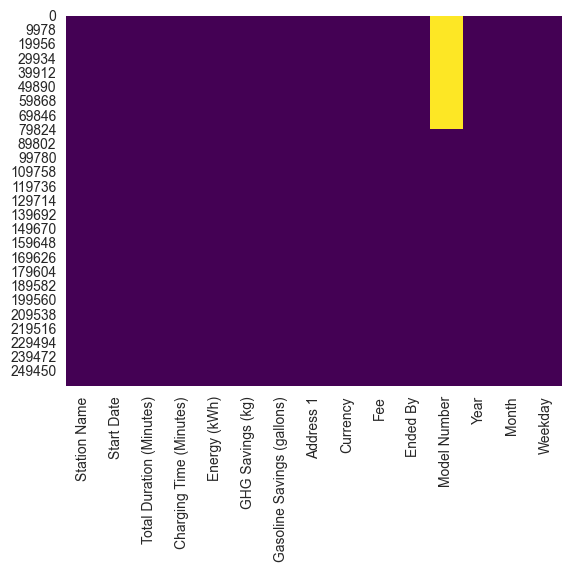

In [ ]:
sns.heatmap(workingEvData.isna(),cmap="viridis",cbar=False)

In [72]:
for column in workingEvData.columns:
    print(column, sum(workingEvData[column].isna()))

Station Name 0
Start Date 0
Total Duration (Minutes) 0
Charging Time (Minutes) 0
Energy (kWh) 0
GHG Savings (kg) 0
Gasoline Savings (gallons) 0
Address 1 0
Currency 1788
Fee 0
Ended By 248
Model Number 78948
Year 0
Month 0
Weekday 0


In [ ]:
print(workingEvData["Currency"].value_counts())
workingEvData.drop(["Currency"],axis=1,inplace=True)

USD    257613
EUR         8
MXN         5
CAD         1
Name: Currency, dtype: int64


In [ ]:
print(workingEvData[workingEvData["Ended By"]=="Unknown"]["Ended By"].value_counts(),"\n")
'''
[workingEvData["Ended By"]=="Unknown"]: This applies the Boolean mask to filter the dataset.
The result is a new dataframe containing only rows where "Ended By" is "Unknown".
Example result:

Index   Ended By
----------------
1       Unknown
3       Unknown

["Ended By"].value_counts(): This counts the values of ended by
'''
workingEvData["Ended By"].fillna("Unknown",inplace=True) 
print(workingEvData["Ended By"].value_counts())

Unknown    32
Name: Ended By, dtype: int64 

Plug Out at Vehicle             210721
Customer                         41090
CPS Server                        7065
Unknown                            280
Outlet Unreachable                  64
Door Open                           57
Plug Removed While Rebooting        50
Final GFCI Tripped                  28
Door                                24
Final 4-strikes GFCI trip           15
Plug Out at Station                  7
Holster Plugin                       7
Station Offline                      3
OCD                                  2
Door Closed                          1
Relay Stuck Closed                   1
Name: Ended By, dtype: int64


## Filling Missing Model Numbers Based on Station Usage

In [ ]:
mydict = workingEvData.groupby("Station Name")["Model Number"].apply(lambda group: group.mode().iloc[0] if not group.mode().empty else None)

'''
This groups the dataset by "Station Name", then applies a function to get the 
most common "Model Number" for each station.
group.mode() returns a Series with the most frequent values.
.iloc[0] ensures that if multiple values share the highest frequency, we pick the first one.
If a group has no mode (group.mode().empty), it assigns None.

{
    "EV Station A": "Model X",
    "EV Station B": "Model Y",
    "EV Station C": "Model Z",
}

'''
def FillModelNumber(row):
    stationName, modelNumber = row[0], row[1]
    return modelNumber if not pd.isna(modelNumber) else mydict.get(stationName, None)

workingEvData["Model Number"] = workingEvData[["Station Name", "Model Number"]].apply(FillModelNumber, axis=1)

'''
This function takes 2 rows/params (row[0] = Station Name, row[1] = Model Number).
If "Model Number" is not missing (NaN), it keeps the existing value.
If "Model Number" is missing, it looks up the station’s most common model in mydict using mydict.get(stationName, None).
'''

In [ ]:
workingEvData.describe()
'''
The function .describe() generates summary statistics for the numerical columns in the dataset.

For each numerical column, describe() calculates the following:
    count – Total number of non-null values.
    mean – The average value.
    std (Standard Deviation) – Measures how spread out the values are.
    min – The smallest value in the column.
    25% (First Quartile, Q1) – The value below which 25% of the data falls.
    50% (Median, Q2) – The middle value of the dataset.
    75% (Third Quartile, Q3) – The value below which 75% of the data falls.
    max – The largest value in the column.'''

,Total Duration (Minutes),Charging Time (Minutes),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Fee,Year,Month,Weekday
count,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000
mean,149.209249,119.947419,8.544277,3.588596,1.072306,1.097481,2016.958121,6.461955,2.859800
std,132.759684,82.955033,7.185462,3.017894,0.901776,1.934408,1.994255,3.467853,1.925194
min,1.000000,0.100000,0.010000,0.004000,0.001000,0.000000,2011.000000,1.000000,0.000000
25%,70.250000,62.400000,3.784000,1.589000,0.475000,0.000000,2016.000000,3.000000,1.000000
50%,125.350000,108.983333,6.868634,2.885000,0.862000,0.000000,2017.000000,6.000000,3.000000
75%,185.400000,161.833333,11.458340,4.813000,1.438000,1.640000,2019.000000,10.000000,4.000000
max,6872.350000,1375.916667,97.360000,40.891000,12.219000,84.560000,2020.000000,12.000000,6.000000


<h1>Interpreting Each Column</h1>

<h2>1️⃣ Total Duration (Minutes)</h2>
<p><strong>The average charging session lasts ~149 minutes.</strong><br>
The minimum session is 1 minute, while the longest session is 6872 minutes (~4.8 days!).<br>
The 75% percentile (185 minutes) suggests most sessions are under 3 hours.</p>

<h2>2️⃣ Charging Time (Minutes)</h2>
<p><strong>The average actual charging time is ~120 minutes.</strong><br>
Some sessions were as short as 0.1 minutes (6 seconds!).<br>
The maximum charging time is ~1376 minutes (~23 hours!).</p>

<h2>3️⃣ Energy (kWh)</h2>
<p><strong>The average energy delivered is ~8.54 kWh.</strong><br>
The minimum recorded charge is 0.01 kWh (basically nothing).<br>
The maximum charge is 97.36 kWh, which is likely a large battery pack.</p>

<h2>4️⃣ GHG Savings (kg) & Gasoline Savings (gallons)</h2>
<h3>GHG Savings (Greenhouse Gas savings in kg CO₂):</h3>
<p><strong>The average savings per session is ~3.59 kg CO₂.</strong><br>
The maximum savings per session is ~40.89 kg CO₂ (likely from long charging sessions).</p>

<h3>Gasoline Savings (gallons):</h3>
<p>On average, a session saves ~1.07 gallons of gas.<br>
The maximum savings is ~12.22 gallons.</p>

<h2>5️⃣ Fee (Charging Cost)</h2>
<p><strong>The average fee is ~$1.10.</strong><br>
Most users pay $0, as seen in the median (50%) and 25% percentile (Q1).<br>
Some users paid up to $84.56 for a session.</p>

<h2>6️⃣ Year</h2>
<p>The data spans from 2011 to 2020.<br>
The average year is ~2017, meaning most data points are from the mid-to-late 2010s.</p>

<h2>7️⃣ Month</h2>
<p>Values range from 1 (January) to 12 (December).<br>
The average is ~6.46, meaning most sessions happen around mid-year (June/July).</p>

<h2>8️⃣ Weekday (0 = Monday, 6 = Sunday)</h2>
<p><strong>The average weekday is ~2.86,</strong> suggesting most sessions occur around Tuesday or Wednesday.<br>
The most frequent charging days (50% & 75% percentiles) fall between Tuesday and Thursday.</p>

C:\Users\bayou\AppData\Local\Temp\ipykernel_25752\669188719.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=workingEvData["Total Duration (Minutes)"], ax=ax, palette="bright")


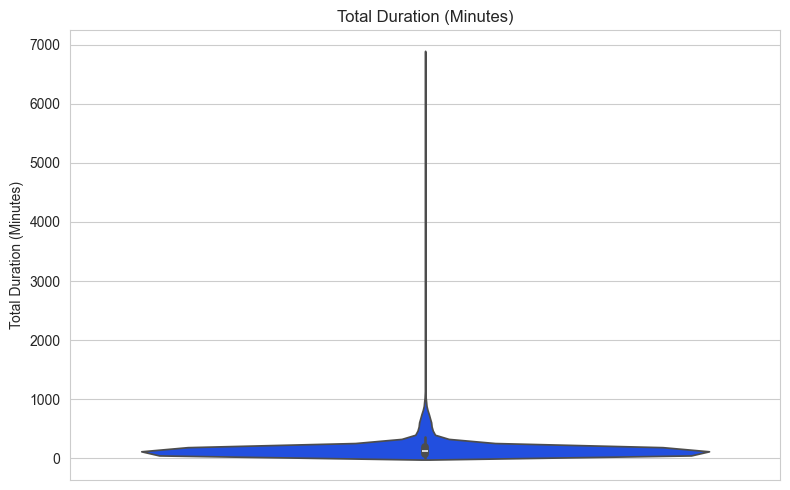

In [ ]:
# Create the figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a violin plot for Total Duration
sns.violinplot(y=workingEvData["Total Duration (Minutes)"], ax=ax, palette="bright")

# Add a title to the plot
ax.set_title("Total Duration (Minutes)")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

The median Total Duration (Minutes) where ended by is 'Plug Out at Vehicle' is: 126.6 minutes
The median Total Duration (Minutes) where ended by is 'Unknown' is: 105.13333333333333 minutes


'\nBox plots are vey powerful tools to get more insights about the data, \nThe box indicates the range in which the middle 50% of all data lies => 25% of data is below the 1st quartile Q1\nand the rest of it is above the 3rd Q3 \nThe solid line means the median: the median is the value that divides the data into \ntwo equal halves—50% of the data points are below it, and 50% are above it.\nThe dots are data points that lie beyond the whiskers of the box plot. \nThe whiskers usually extend to the minimum and maximum values within 1.5 times \nthe interquartile range (IQR) from the first quartile (Q1) and third quartile (Q3)\n'

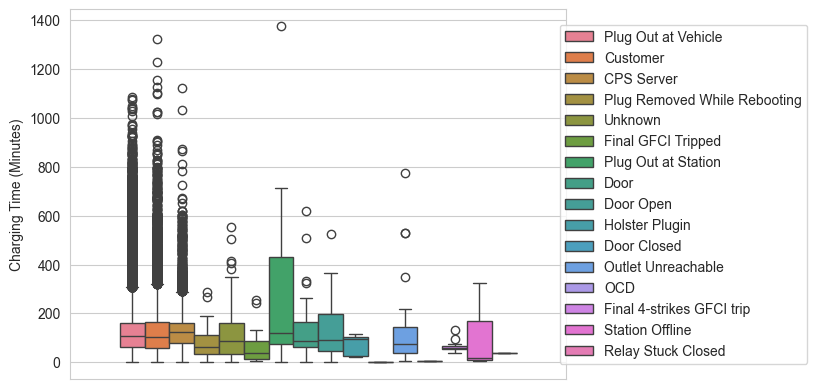

In [137]:
sns.boxplot(y=workingEvData["Charging Time (Minutes)"],hue=workingEvData["Ended By"])
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

filtered_data1 = workingEvData[workingEvData["Ended By"] == "Plug Out at Vehicle"]
filtered_data2 = workingEvData[workingEvData["Ended By"] == "Unknown"]
# Calculate the median of Total Duration (Minutes) for the filtered data
median_duration = filtered_data1["Total Duration (Minutes)"].median()
median_duration2 = filtered_data2["Total Duration (Minutes)"].median()
print(f"The median Total Duration (Minutes) where ended by is 'Plug Out at Vehicle' is: {median_duration} minutes")
print(f"The median Total Duration (Minutes) where ended by is 'Unknown' is: {median_duration2} minutes")

'''
Box plots are vey powerful tools to get more insights about the data, 
The box indicates the range in which the middle 50% of all data lies => 25% of data is below the 1st quartile Q1
and the rest of it is above the 3rd Q3 
The solid line means the median: the median is the value that divides the data into 
two equal halves—50% of the data points are below it, and 50% are above it.
The dots are data points that lie beyond the whiskers of the box plot. 
The whiskers usually extend to the minimum and maximum values within 1.5 times 
the interquartile range (IQR) from the first quartile (Q1) and third quartile (Q3)
'''

<Axes: xlabel='Energy (kWh)', ylabel='Count'>

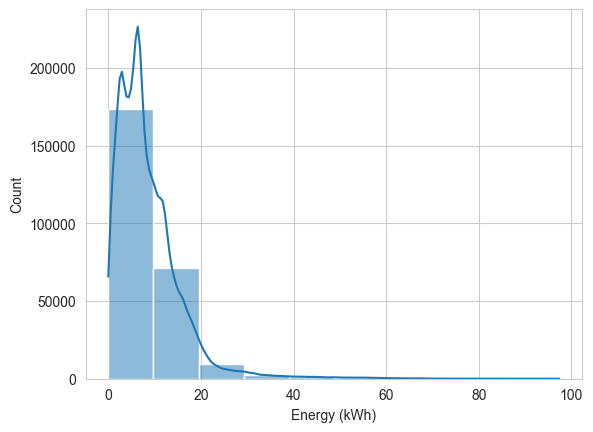

In [79]:
sns.histplot(workingEvData["Energy (kWh)"],kde=True,bins=10)

<b>This plot combines two types of visualizations: a histogram (the blue bars) and a kernel density estimate (KDE) curve (the blue line). It shows the distribution of energy consumption (in kilowatt-hours, kWh) for a dataset. Here’s how we can interpret it:</b>

<b>1. Overall Structure</b>
<ul>
<li><b>X-Axis (Energy, kWh):</b> This represents the amount of energy consumed, ranging from 0 to 100 kWh during a charging session.</li>
<li><b>Y-Axis (Count):</b> This represents the number of occurrences (or frequency) of each energy value in the dataset, up to 20,000 counts.</li>
<li><b>Histogram (Blue Bars):</b> The bars show the frequency of energy consumption within specific ranges (bins) along the x-axis.</li>
<li><b>KDE Curve (Blue Line):</b> The smooth line overlays the histogram and estimates the probability density of the data, providing a continuous representation of the distribution.</li>
</ul>

<b>2. Key Features</b>
<ul>
<li><b>Peaks in the Histogram and KDE:</b> There are two prominent peaks in the distribution:
  <ul>
    <li>The tallest bar is around 0–20 kWh, with a count of approximately 15,000–20,000. This indicates that a large number of instances (or data points) have energy consumption in this range.</li>
    <li>A smaller peak is around 20–40 kWh, with a count of about 5,000–10,000, showing a secondary cluster of data points with higher energy consumption.</li>
  </ul>
The KDE curve follows the shape of the histogram, peaking at the same points (around 10–20 kWh and 20–40 kWh), confirming these as the most common energy consumption ranges.</li>
<li><b>Decline After 40 kWh:</b> Beyond 40 kWh, both the histogram bars and the KDE curve drop sharply, indicating very few instances of energy consumption above this level. The count approaches zero by 60 kWh and remains negligible up to 100 kWh, suggesting that high energy consumption (above 40 kWh) is rare in this dataset.</li>
</ul>

<b>3. Interpretation</b>
<ul>
<li><b>Most Common Energy Consumption:</b> The majority of sessions consume between 0–40 kWh, with the highest frequency in the 0–20 kWh range. This could indicate that most charging events are for low-energy needs.</li>
<li><b>Rare High Consumption:</b> Energy consumption above 40 kWh is uncommon, as shown by the near-zero counts and the flat KDE curve in that range. This might suggest that full charges or high-energy demands (long trips) are less frequent.</li>
</ul>

<ul>
<li>Low-energy charges (0–20 kWh) for short trips or quick top-ups.</li>
<li>Moderate-energy charges (20–40 kWh) for longer trips or more significant charging needs.</li>
</ul>
<p>The rarity of high energy consumption (above 40 kWh) could indicate that most EV users don’t fully charge their vehicles or that the dataset primarily includes partial charges.</p>

<b>5. Statistical Insights</b>
<ul>
<li><b>Median and Mean:</b> While not explicitly shown, the median and mean are likely within the 0–40 kWh range, given the concentration of data there.</li>
<li><b>Spread:</b> The data has a wide range (0–100 kWh), but most values are clustered at the lower end, with very few instances at higher energy levels.</li>
<li><b>Recommendations:</b> We could recommend to the R&D team to maybe work on a charging station that somehow tries to deliver the particular first 20kWh as fast as possinble, since most clients come to charge within that specific range, so we could save them as much time as possible</li>
</ul>

## Energy Consumption Analysis By Seasons (Winter vs Summer)

In [148]:
energy_summer = workingEvData[(workingEvData["Year"] >= 2018) & (workingEvData["Month"].isin([6, 7, 8]))]
energy_by_month = energy_summer.groupby("Month")["Energy (kWh)"].sum()
print(energy_by_month)

energy_summer = workingEvData[(workingEvData["Year"] >= 2018) & (workingEvData["Month"].isin([1, 2, 3]))]
energy_by_month = energy_summer.groupby("Month")["Energy (kWh)"].sum()
print(energy_by_month)

Month
6    75765.805
7    75261.040
8    80693.717
Name: Energy (kWh), dtype: float64
Month
1    108136.952
2     98527.986
3     86470.436
Name: Energy (kWh), dtype: float64


<b>We can notice that consumption during winters is larger compared to summers, this could be due to people travelling and leaving their cars behind, not needing to charge them during summers that frequently maybe.</b>

<b>We might also need to schedule any needed maintenance or upgrade work sometimes during a Sunday (Reason for Sunday is shown below) in the month of August, since that's probably the month with the lowest visits of the year.</b>

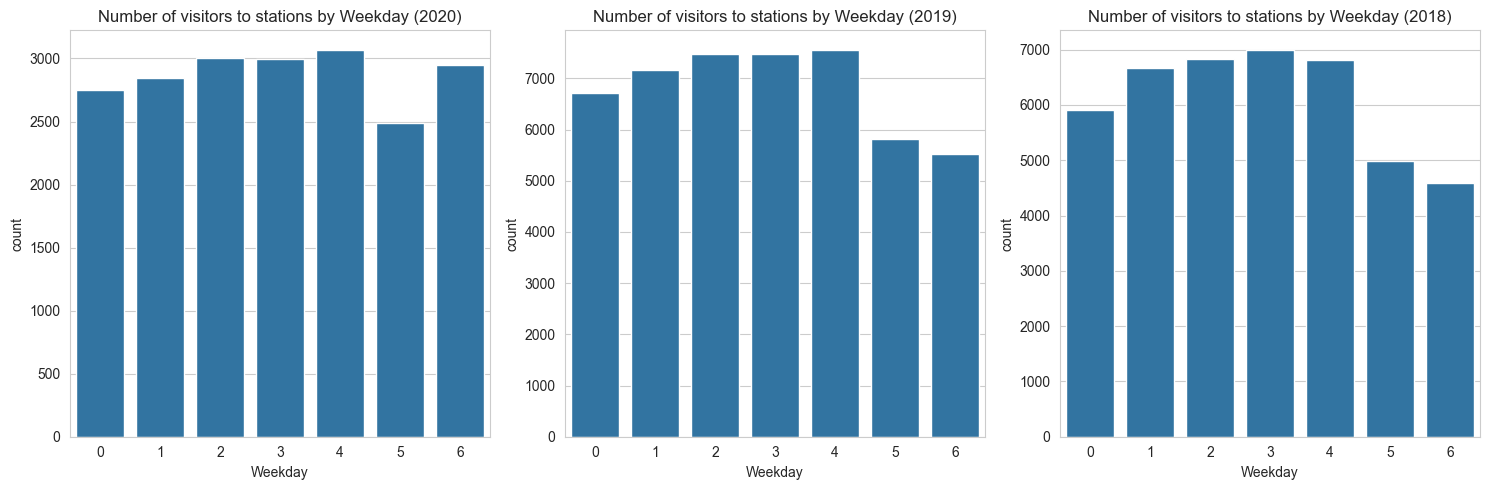

In [149]:
# Filter the data for 2020, 2019, and 2018
filtered_data_2020 = workingEvData[workingEvData["Year"] == 2020]
filtered_data_2019 = workingEvData[workingEvData["Year"] == 2019]
filtered_data_2018 = workingEvData[workingEvData["Year"] == 2018]

# Create the plots for each year
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 2020
sns.countplot(x=filtered_data_2020["Weekday"], ax=axes[0])
axes[0].set_title("Number of visitors to stations by Weekday (2020)")

# Plot for 2019
sns.countplot(x=filtered_data_2019["Weekday"], ax=axes[1])
axes[1].set_title("Number of visitors to stations by Weekday (2019)")

# Plot for 2018
sns.countplot(x=filtered_data_2018["Weekday"], ax=axes[2])
axes[2].set_title("Number of visitors to stations by Weekday (2018)")

# Adjust layout
plt.tight_layout()
plt.show()


<b>We can notice that all around we receive a relatively similar amount of people each week day, 
with a particular slight peak during Friday. We can also notice that we received the least amount of 
people during Saturday or Sunday, so we can advise that if a station needed to be shut down for maintenance 
or quick fixing and upgrading, the best day to do it would probably be Sunday, and we should most definitely avoid 
Friday for such things.</b>

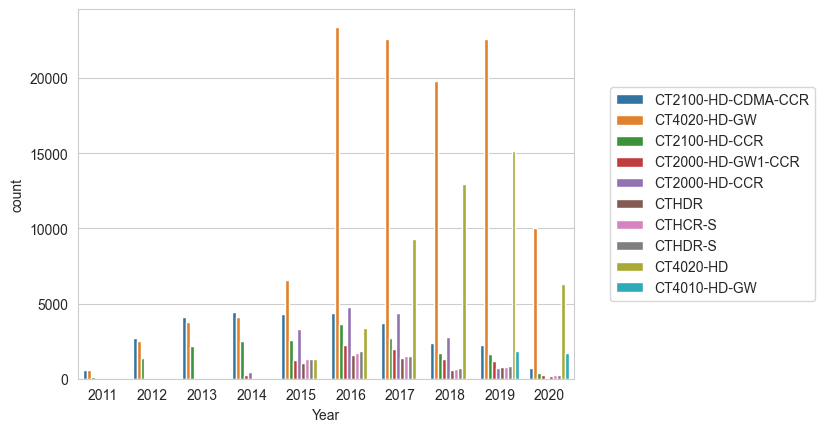

In [ ]:
sns.countplot(x=workingEvData["Year"],hue=workingEvData["Model Number"])
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

<b>What we can analyze from this figure and deduce is that we should most definitely in the future start producing more of CT-4020-HD-GW, since it's the model that's trending recently, and maybe we can even cut production of models like CTHCR-S or CTHDR-S, since they're barely even used, to shift our focus towards more important models.</b>

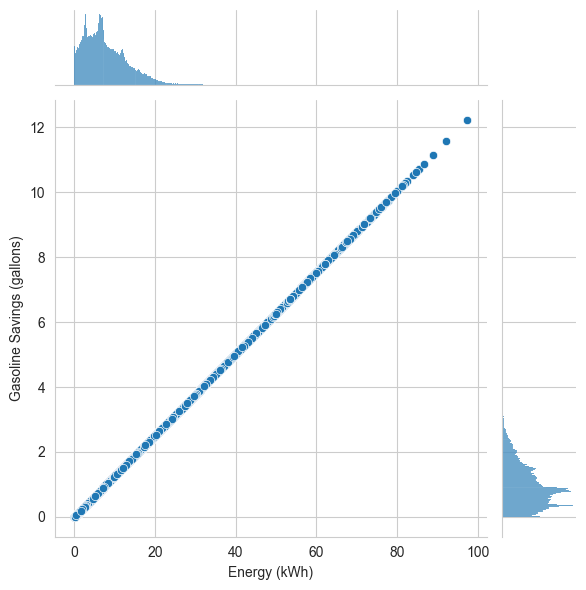

In [150]:
sns.jointplot(x="Energy (kWh)",y="Gasoline Savings (gallons)",data=workingEvData)

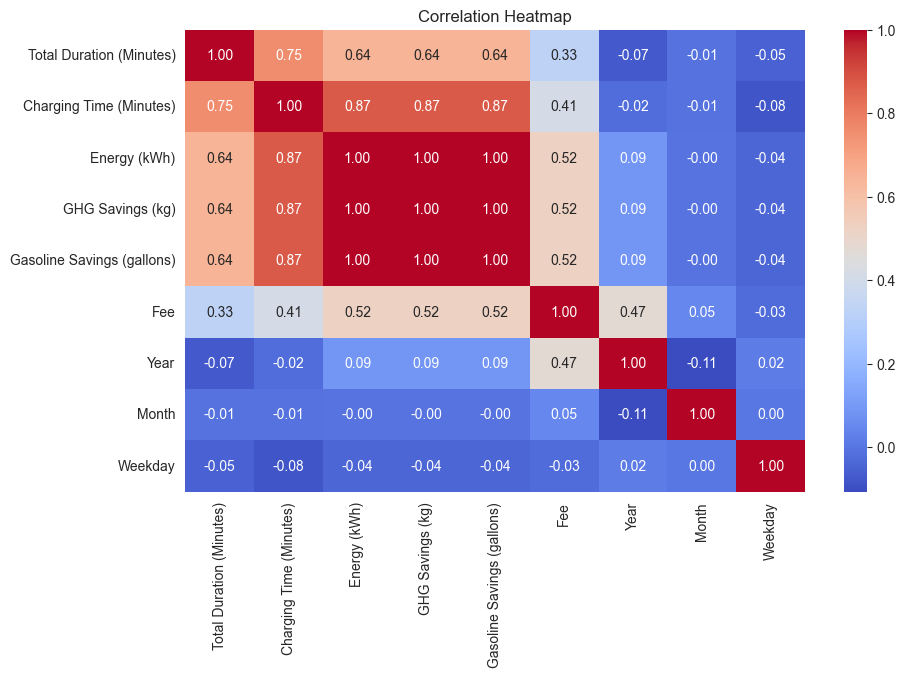

In [ ]:
numeric_data = workingEvData.select_dtypes(include=["number"])

# Compute correlation
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

'''
GHG stands for Greenhouse Gas. Greenhouse gases are gases in the Earth's atmosphere that trap heat and contribute to 
the greenhouse effect, which warms the planet. These gases allow sunlight to enter the atmosphere but prevent some of 
the heat from escaping back into space, leading to a rise in global temperatures and global warming'''

SLM predictions shape: (77825, 2)
SLM y_test shape: (77825, 2)
MLR_v1 predictions shape: (77825, 2)
MLR_v1 y_test shape: (77825, 2)
MLR_v2 predictions shape: (77825, 2)
MLR_v2 y_test shape: (77825, 2)
Plotting SLM for GHG Savings - Points: 77825
Plotting MLR_v1 for GHG Savings - Points: 77825
Plotting MLR_v2 for GHG Savings - Points: 77825
Plotting SLM for Gasoline Savings - Points: 77825
Plotting MLR_v1 for Gasoline Savings - Points: 77825
Plotting MLR_v2 for Gasoline Savings - Points: 77825


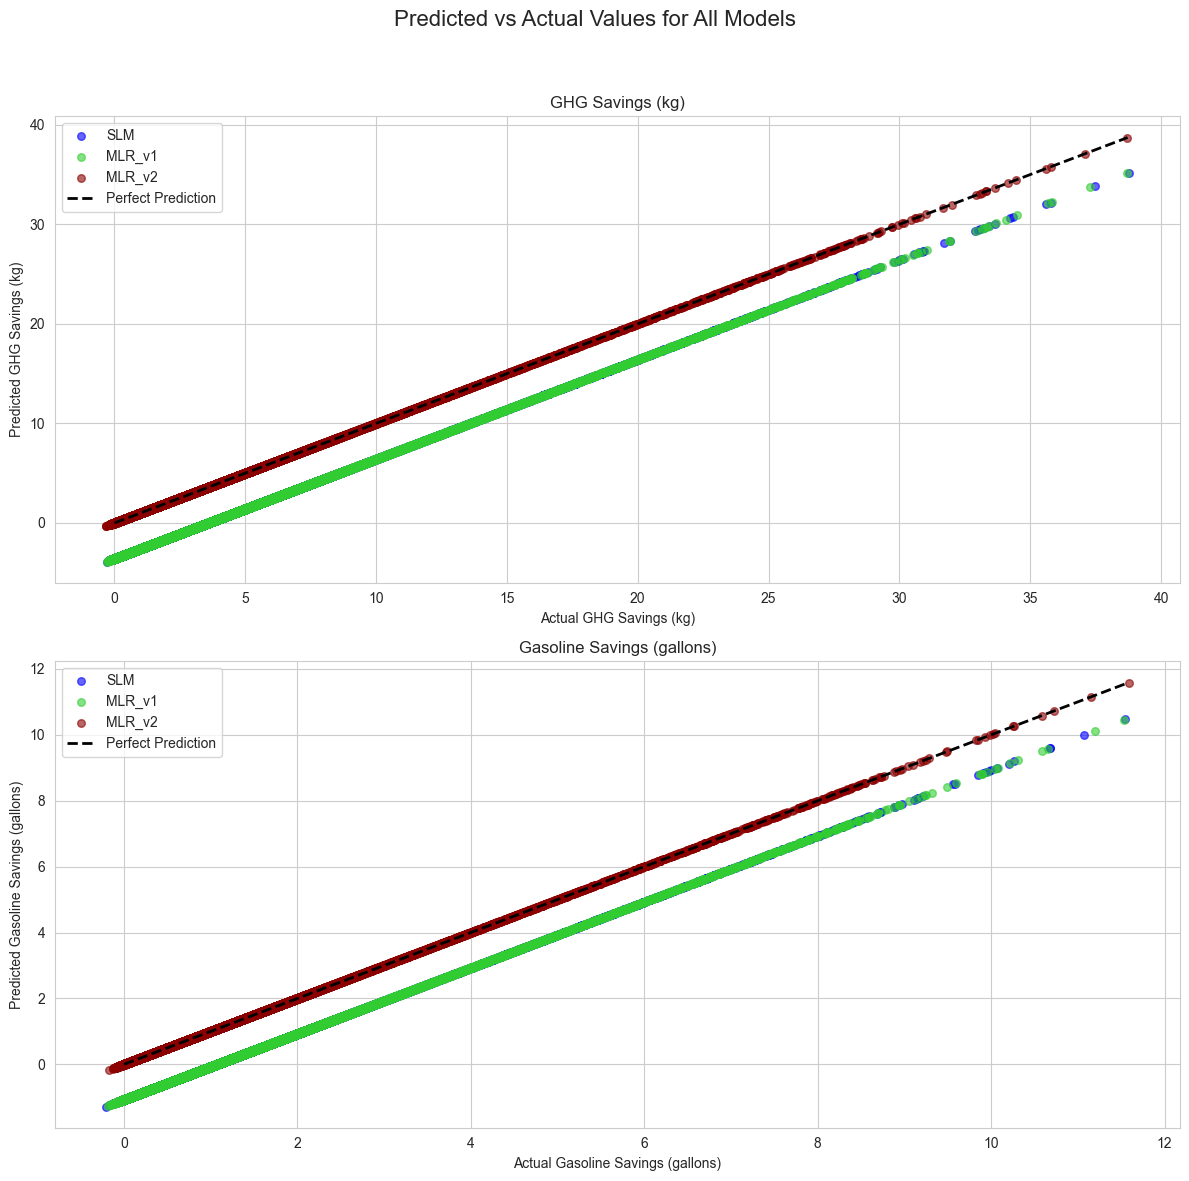

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Preprocessing
modelNumber_label_encoder = LabelEncoder()
workingEvData["Model Number"] = modelNumber_label_encoder.fit_transform(workingEvData["Model Number"])
stationLabelEncoder = LabelEncoder()
workingEvData['Station Name'] = stationLabelEncoder.fit_transform(workingEvData['Station Name'])
addressLabelEncoder = LabelEncoder()
workingEvData['Address 1'] = addressLabelEncoder.fit_transform(workingEvData['Address 1'])

# Dictionary to store predictions and actual values
results = {
    "SLM": {},
    "MLR_v1": {},
    "MLR_v2": {}
}

# --- Model 1: SLM ---
X_Data = workingEvData[["Energy (kWh)"]]
Y_Data = workingEvData[["GHG Savings (kg)", "Gasoline Savings (gallons)"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

#Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linearModel = LinearRegression(fit_intercept=False)
linearModel.fit(X_train_scaled, y_train)
predictions = linearModel.predict(X_test_scaled)

results["SLM"]["predictions"] = predictions
results["SLM"]["y_test"] = y_test.values
print("SLM predictions shape:", predictions.shape)
print("SLM y_test shape:", y_test.values.shape)

# --- Model 2: MLR v1 ---
X_Data = workingEvData[["Charging Time (Minutes)", "Energy (kWh)"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linearModel = LinearRegression(fit_intercept=False)
linearModel.fit(X_train_scaled, y_train)
predictions = linearModel.predict(X_test_scaled)

results["MLR_v1"]["predictions"] = predictions
results["MLR_v1"]["y_test"] = y_test.values
print("MLR_v1 predictions shape:", predictions.shape)
print("MLR_v1 y_test shape:", y_test.values.shape)

# --- Model 3: MLR v2 ---
X_Data = workingEvData[["Charging Time (Minutes)", "Energy (kWh)", "Year", "Model Number"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

columns_To_Scale = ["Charging Time (Minutes)", "Energy (kWh)"]
X_train_subset = X_train[columns_To_Scale]
X_test_subset = X_test[columns_To_Scale]

scaler = StandardScaler()
X_train_subset = scaler.fit_transform(X_train_subset)
X_test_subset = scaler.transform(X_test_subset)

X_train[columns_To_Scale] = X_train_subset
X_test[columns_To_Scale] = X_test_subset

linearModel = LinearRegression(fit_intercept=False)
linearModel.fit(X_train, y_train)
predictions = linearModel.predict(X_test)

results["MLR_v2"]["predictions"] = predictions
results["MLR_v2"]["y_test"] = y_test.values
print("MLR_v2 predictions shape:", predictions.shape)
print("MLR_v2 y_test shape:", y_test.values.shape)

# --- Plotting ---
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=False)  # Slightly larger figure for clarity
fig.suptitle("Predicted vs Actual Values for All Models", fontsize=16)

# Colors for each model (ensuring distinct colors)
colors = {"SLM": "blue", "MLR_v1": "limegreen", "MLR_v2": "darkred"}

# Plot for GHG Savings (kg)
for model_name in results:
    y_true = results[model_name]["y_test"][:, 0]  # GHG Savings (kg)
    y_pred = results[model_name]["predictions"][:, 0]
    print(f"Plotting {model_name} for GHG Savings - Points: {len(y_true)}")
    # Add slight jitter to reduce overlap and increase marker size
    jitter = np.random.normal(0, 0.1, len(y_true))  # Small random jitter
    axes[0].scatter(y_true + jitter, y_pred + jitter, label=model_name, alpha=0.6, c=colors[model_name], s=30)

axes[0].plot([y_test["GHG Savings (kg)"].min(), y_test["GHG Savings (kg)"].max()],
             [y_test["GHG Savings (kg)"].min(), y_test["GHG Savings (kg)"].max()],
             'k--', lw=2, label="Perfect Prediction")
axes[0].set_xlabel("Actual GHG Savings (kg)")
axes[0].set_ylabel("Predicted GHG Savings (kg)")
axes[0].set_title("GHG Savings (kg)")
axes[0].legend()
axes[0].grid(True)

# Plot for Gasoline Savings (gallons)
for model_name in results:
    y_true = results[model_name]["y_test"][:, 1]  # Gasoline Savings (gallons)
    y_pred = results[model_name]["predictions"][:, 1]
    print(f"Plotting {model_name} for Gasoline Savings - Points: {len(y_true)}")
    # Add slight jitter to reduce overlap and increase marker size
    jitter = np.random.normal(0, 0.05, len(y_true))  # Smaller jitter for smaller range
    axes[1].scatter(y_true + jitter, y_pred + jitter, label=model_name, alpha=0.6, c=colors[model_name], s=30)

axes[1].plot([y_test["Gasoline Savings (gallons)"].min(), y_test["Gasoline Savings (gallons)"].max()],
             [y_test["Gasoline Savings (gallons)"].min(), y_test["Gasoline Savings (gallons)"].max()],
             'k--', lw=2, label="Perfect Prediction")
axes[1].set_xlabel("Actual Gasoline Savings (gallons)")
axes[1].set_ylabel("Predicted Gasoline Savings (gallons)")
axes[1].set_title("Gasoline Savings (gallons)")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

SLM predictions shape: (77825, 2)
SLM y_test shape: (77825, 2)
MLR_v1 predictions shape: (77825, 2)
MLR_v1 y_test shape: (77825, 2)
MLR_v2 predictions shape: (77825, 2)
MLR_v2 y_test shape: (77825, 2)

Model Parameters for MLR_v2:
                             Intercept  Charging Time (Minutes)  Energy (kWh)  \
GHG Savings (kg)                  0.0                 0.001483      3.008235   
Gasoline Savings (gallons)        0.0                 0.000444      0.898889   

                                Year  Model Number  
GHG Savings (kg)            0.001779     -0.000337  
Gasoline Savings (gallons)  0.000532     -0.000101  
Plotting SLM for GHG Savings - Points: 77825
Plotting MLR_v1 for GHG Savings - Points: 77825
Plotting MLR_v2 for GHG Savings - Points: 77825
Plotting SLM for Gasoline Savings - Points: 77825
Plotting MLR_v1 for Gasoline Savings - Points: 77825
Plotting MLR_v2 for Gasoline Savings - Points: 77825


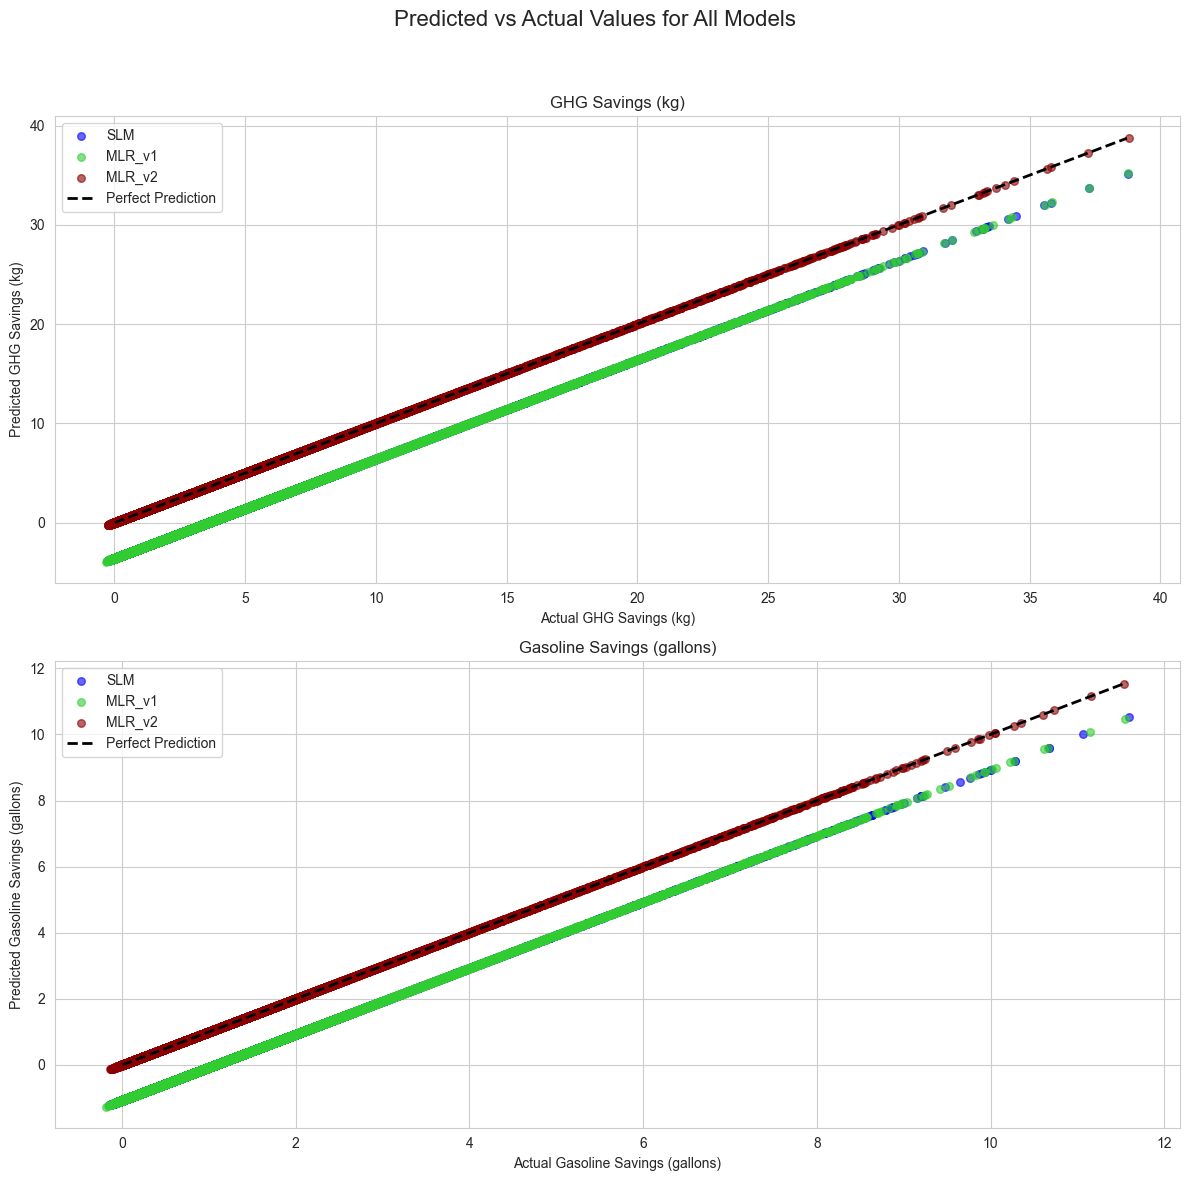

C:\Users\bayou\AppData\Local\Temp\ipykernel_25752\2560258736.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_class[column] = LabelEncoder().fit_transform(X_class[column])
C:\Users\bayou\AppData\Local\Temp\ipykernel_25752\2560258736.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_class[column] = LabelEncoder().fit_transform(X_class[column])
C:\Users\bayou\AppData\Local\Temp\ipykernel_25752\2560258736.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data


Classification Results for Usage Patterns:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

  High Usage       1.00      1.00      1.00     25997
   Low Usage       1.00      1.00      1.00     25977
Medium Usage       1.00      1.00      1.00     25851

    accuracy                           1.00     77825
   macro avg       1.00      1.00      1.00     77825
weighted avg       1.00      1.00      1.00     77825



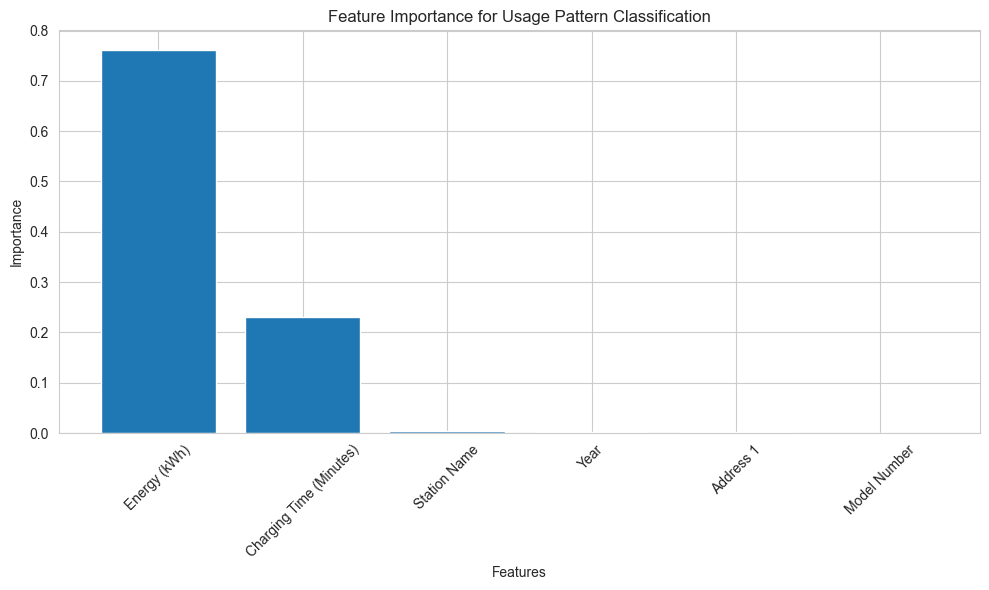

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Preprocessing for Regression Models
modelNumber_label_encoder = LabelEncoder()
workingEvData["Model Number"] = modelNumber_label_encoder.fit_transform(workingEvData["Model Number"])
stationLabelEncoder = LabelEncoder()
workingEvData['Station Name'] = stationLabelEncoder.fit_transform(workingEvData['Station Name'])
addressLabelEncoder = LabelEncoder()
workingEvData['Address 1'] = addressLabelEncoder.fit_transform(workingEvData['Address 1'])

# Dictionary to store predictions and actual values for regression
results = {
    "SLM": {},
    "MLR_v1": {},
    "MLR_v2": {}
}

# --- Model 1: SLM ---
X_Data = workingEvData[["Energy (kWh)"]]
Y_Data = workingEvData[["GHG Savings (kg)", "Gasoline Savings (gallons)"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linearModel = LinearRegression(fit_intercept=False)
linearModel.fit(X_train_scaled, y_train)
predictions = linearModel.predict(X_test_scaled)

results["SLM"]["predictions"] = predictions
results["SLM"]["y_test"] = y_test.values
print("SLM predictions shape:", predictions.shape)
print("SLM y_test shape:", y_test.values.shape)

# --- Model 2: MLR v1 ---
X_Data = workingEvData[["Charging Time (Minutes)", "Energy (kWh)"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linearModel = LinearRegression(fit_intercept=False)
linearModel.fit(X_train_scaled, y_train)
predictions = linearModel.predict(X_test_scaled)

results["MLR_v1"]["predictions"] = predictions
results["MLR_v1"]["y_test"] = y_test.values
print("MLR_v1 predictions shape:", predictions.shape)
print("MLR_v1 y_test shape:", y_test.values.shape)

# --- Model 3: MLR v2 ---
X_Data = workingEvData[["Charging Time (Minutes)", "Energy (kWh)", "Year", "Model Number"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

columns_To_Scale = ["Charging Time (Minutes)", "Energy (kWh)"]
X_train_subset = X_train[columns_To_Scale]
X_test_subset = X_test[columns_To_Scale]

scaler = StandardScaler()
X_train_subset = scaler.fit_transform(X_train_subset)
X_test_subset = scaler.transform(X_test_subset)

X_train[columns_To_Scale] = X_train_subset
X_test[columns_To_Scale] = X_test_subset

linearModel = LinearRegression(fit_intercept=False)
linearModel.fit(X_train, y_train)
predictions = linearModel.predict(X_test)

results["MLR_v2"]["predictions"] = predictions
results["MLR_v2"]["y_test"] = y_test.values
print("MLR_v2 predictions shape:", predictions.shape)
print("MLR_v2 y_test shape:", y_test.values.shape)

# Model Parameters for MLR_v2
df = pd.DataFrame(linearModel.coef_, columns=["Charging Time (Minutes)", "Energy (kWh)", "Year", "Model Number"], 
                  index=["GHG Savings (kg)", "Gasoline Savings (gallons)"])
df1 = pd.DataFrame(linearModel.intercept_, columns=["Intercept"], 
                   index=["GHG Savings (kg)", "Gasoline Savings (gallons)"])
modelParameters = pd.concat([df1, df], axis=1)
print("\nModel Parameters for MLR_v2:\n", modelParameters)

# --- Plotting Regression Results ---
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=False)
fig.suptitle("Predicted vs Actual Values for All Models", fontsize=16)

# Colors for each model
colors = {"SLM": "blue", "MLR_v1": "limegreen", "MLR_v2": "darkred"}

# Plot for GHG Savings (kg)
for model_name in results:
    y_true = results[model_name]["y_test"][:, 0]  # GHG Savings (kg)
    y_pred = results[model_name]["predictions"][:, 0]
    print(f"Plotting {model_name} for GHG Savings - Points: {len(y_true)}")
    jitter = np.random.normal(0, 0.1, len(y_true))  # Small random jitter
    axes[0].scatter(y_true + jitter, y_pred + jitter, label=model_name, alpha=0.6, c=colors[model_name], s=30)

axes[0].plot([y_test["GHG Savings (kg)"].min(), y_test["GHG Savings (kg)"].max()],
             [y_test["GHG Savings (kg)"].min(), y_test["GHG Savings (kg)"].max()],
             'k--', lw=2, label="Perfect Prediction")
axes[0].set_xlabel("Actual GHG Savings (kg)")
axes[0].set_ylabel("Predicted GHG Savings (kg)")
axes[0].set_title("GHG Savings (kg)")
axes[0].legend()
axes[0].grid(True)

# Plot for Gasoline Savings (gallons)
for model_name in results:
    y_true = results[model_name]["y_test"][:, 1]  # Gasoline Savings (gallons)
    y_pred = results[model_name]["predictions"][:, 1]
    print(f"Plotting {model_name} for Gasoline Savings - Points: {len(y_true)}")
    jitter = np.random.normal(0, 0.05, len(y_true))  # Smaller jitter for smaller range
    axes[1].scatter(y_true + jitter, y_pred + jitter, label=model_name, alpha=0.6, c=colors[model_name], s=30)

axes[1].plot([y_test["Gasoline Savings (gallons)"].min(), y_test["Gasoline Savings (gallons)"].max()],
             [y_test["Gasoline Savings (gallons)"].min(), y_test["Gasoline Savings (gallons)"].max()],
             'k--', lw=2, label="Perfect Prediction")
axes[1].set_xlabel("Actual Gasoline Savings (gallons)")
axes[1].set_ylabel("Predicted Gasoline Savings (gallons)")
axes[1].set_title("Gasoline Savings (gallons)")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

# --- Classification Task: Predicting Usage Patterns ---
# Create usage categories based on Energy (kWh)
energy_quantiles = np.percentile(workingEvData["Energy (kWh)"], [25, 50, 75])
workingEvData["Usage_Category"] = pd.qcut(workingEvData["Energy (kWh)"], q=3, labels=["Low Usage", "Medium Usage", "High Usage"])

# Encode the categorical target for modeling
usage_encoder = LabelEncoder()
workingEvData["Usage_Category_Encoded"] = usage_encoder.fit_transform(workingEvData["Usage_Category"])

# Features and target for classification
X_class = workingEvData[["Charging Time (Minutes)", "Energy (kWh)", "Year", "Model Number", "Station Name", "Address 1"]]
y_class = workingEvData["Usage_Category_Encoded"]

# Encode categorical features
for column in ["Station Name", "Address 1", "Model Number"]:
    X_class[column] = LabelEncoder().fit_transform(X_class[column])

# Split the data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.30, random_state=101)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=101)
rf_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = rf_model.predict(X_test_class)

# Evaluate the classification model
print("\nClassification Results for Usage Patterns:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class, target_names=usage_encoder.classes_))

# Feature Importance Plot for Classification
feature_importance = pd.DataFrame({
    'feature': X_class.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title("Feature Importance for Usage Pattern Classification")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Interpreting the Model Evaluation Results</h1>

<h2>Accuracy = 1.0</h2>
<p><strong>This means that the model made no mistakes in its predictions.</strong><br>
It correctly classified every single instance in the dataset, achieving 100% accuracy.</p>

<h2>Precision, Recall, F1-Score for Each Class (High Usage, Low Usage, Medium Usage):</h2>
<ul>
    <li><strong>Precision:</strong> The percentage of positive predictions (e.g., "High Usage") that are actually correct. In your case, precision is 1.00 for all classes, meaning every predicted label was correct for each class.</li>
    <li><strong>Recall:</strong> The percentage of actual positives (e.g., actual "High Usage" instances) that were correctly identified by the model. Here, recall is also 1.00 for all classes, indicating that the model correctly identified all instances of each class.</li>
    <li><strong>F1-Score:</strong> The harmonic mean of precision and recall, which is also 1.00 for all classes, reflecting a perfect balance between precision and recall.</li>
    <li><strong>Support:</strong> This represents the number of instances for each class. For example, there are 25,997 instances of High Usage, 25,977 of Low Usage, and 25,851 of Medium Usage.</li>
</ul>

<h2>Macro Average</h2>
<p><strong>The average precision, recall, and F1-score across all classes.</strong><br>
All are 1.00, meaning the model performed equally well across all classes.</p>

<h2>Weighted Average</h2>
<p><strong>The weighted average of precision, recall, and F1-score across all classes, weighted by the support (number of instances in each class).</strong><br>
Here, it's also 1.00, which further confirms perfect performance.</p>

<h2>Does This Mean I should be extremely happy I Got 100% Accuracy in my model?</h2>
<p><strong>While this result indicates perfect accuracy on this dataset, it's important to consider a few points:</strong></p>
<ul>
    <li><strong>Overfitting:</strong> If your model performs perfectly on the training data but fails to generalize well to new, unseen data, it might be overfitting. This means the model has memorized the training data rather than learning the general patterns.</li>
    <li><strong>Data Leakage:</strong> If there was any data leakage (information from the test set was used during training), this could artificially inflate the accuracy.</li>
    <li><strong>Class Imbalance:</strong> In some cases, the model might be biased toward predicting the majority class, especially if the dataset is imbalanced. However, since all classes have a high support here, it’s unlikely to be the issue in this case.</li>
</ul>

<h2>What to Check Next:</h2>
<ul>
    <li><strong>Evaluate on a separate test set:</strong> Ensure the model performs well on unseen data (data that wasn't part of the training set).</li>
    <li><strong>Cross-validation:</strong> This can help confirm that your model isn't overfitting and generalizes well across different subsets of data.</li>
</ul>


C:\Users\bayou\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


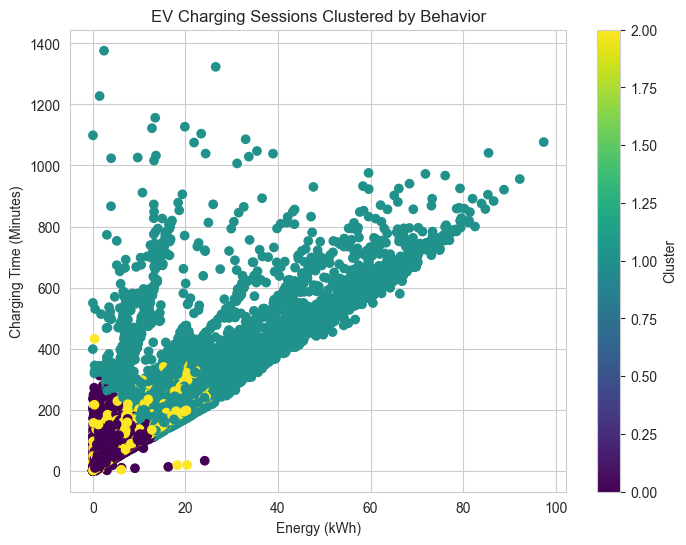


Cluster Summary:
          Energy (kWh)  Charging Time (Minutes)  Station Name  Model Number
Cluster                                                                   
0            5.458238                85.113715            13             6
1           17.903631               228.685338            13             6
2            8.274043               113.830518            44             6


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Prepare the data
features = ["Energy (kWh)", "Charging Time (Minutes)", "Year", "Station Name", "Model Number", "Address 1"]
X = workingEvData[features].copy()

# Encode categorical features
for column in ["Station Name", "Model Number", "Address 1"]:
    X[column] = LabelEncoder().fit_transform(X[column])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering (3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=101)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
workingEvData["Cluster"] = clusters

# Visualize the clusters using Energy (kWh) and Charging Time (Minutes)
plt.figure(figsize=(8, 6))
plt.scatter(workingEvData["Energy (kWh)"], workingEvData["Charging Time (Minutes)"], c=workingEvData["Cluster"], cmap='viridis')
plt.title("EV Charging Sessions Clustered by Behavior")
plt.xlabel("Energy (kWh)")
plt.ylabel("Charging Time (Minutes)")
plt.colorbar(label="Cluster")
plt.show()

# Summarize clusters
cluster_summary = workingEvData.groupby("Cluster").agg({
    "Energy (kWh)": "mean",
    "Charging Time (Minutes)": "mean",
    "Station Name": lambda x: x.mode()[0],
    "Model Number": lambda x: x.mode()[0]
})
print("\nCluster Summary:\n", cluster_summary)

Epoch 1/10


C:\Users\bayou\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4540/4540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3889 - val_loss: 4.4125e-04
Epoch 2/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.0706e-04 - val_loss: 2.1135e-04
Epoch 3/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1846e-04 - val_loss: 9.3487e-04
Epoch 4/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 7.4805e-04 - val_loss: 4.7180e-04
Epoch 5/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1684e-04 - val_loss: 1.2068e-04
Epoch 6/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 1.7465e-04 - val_loss: 2.6371e-05
Epoch 7/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.5269e-04 - val_loss: 5.5225e-04
Epoch 8/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.1039e-04 - val_loss: 6.1746e-05
Epoch 9/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.0016e-04 - val_loss: 2.7688e-05
Epoch 10/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.0803e-04 - val_loss: 1.5433e-05
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 2s 614us/step

MLP Regr

C:\Users\bayou\AppData\Local\Temp\ipykernel_25752\4006959946.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_class[column] = LabelEncoder().fit_transform(X_class[column])
C:\Users\bayou\AppData\Local\Temp\ipykernel_25752\4006959946.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_class[column] = LabelEncoder().fit_transform(X_class[column])
C:\Users\bayou\AppData\Local\Temp\ipykernel_25752\4006959946.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

4540/4540 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9148 - loss: 0.2164 - val_accuracy: 0.9790 - val_loss: 0.0496
Epoch 2/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9804 - loss: 0.0496 - val_accuracy: 0.9879 - val_loss: 0.0310
Epoch 3/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9836 - loss: 0.0411 - val_accuracy: 0.9831 - val_loss: 0.0388
Epoch 4/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9858 - loss: 0.0334 - val_accuracy: 0.9883 - val_loss: 0.0261
Epoch 5/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9878 - loss: 0.0293 - val_accuracy: 0.9854 - val_loss: 0.0317
Epoch 6/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9878 - loss: 0.0297 - val_accuracy: 0.9733 - val_loss: 0.0669
Epoch 7/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9879 - loss: 0.0269 - val_accuracy: 0.9923 - val_loss: 0.0177
Epoch 8/10
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9896 - loss: 0.0253 - val_accurac

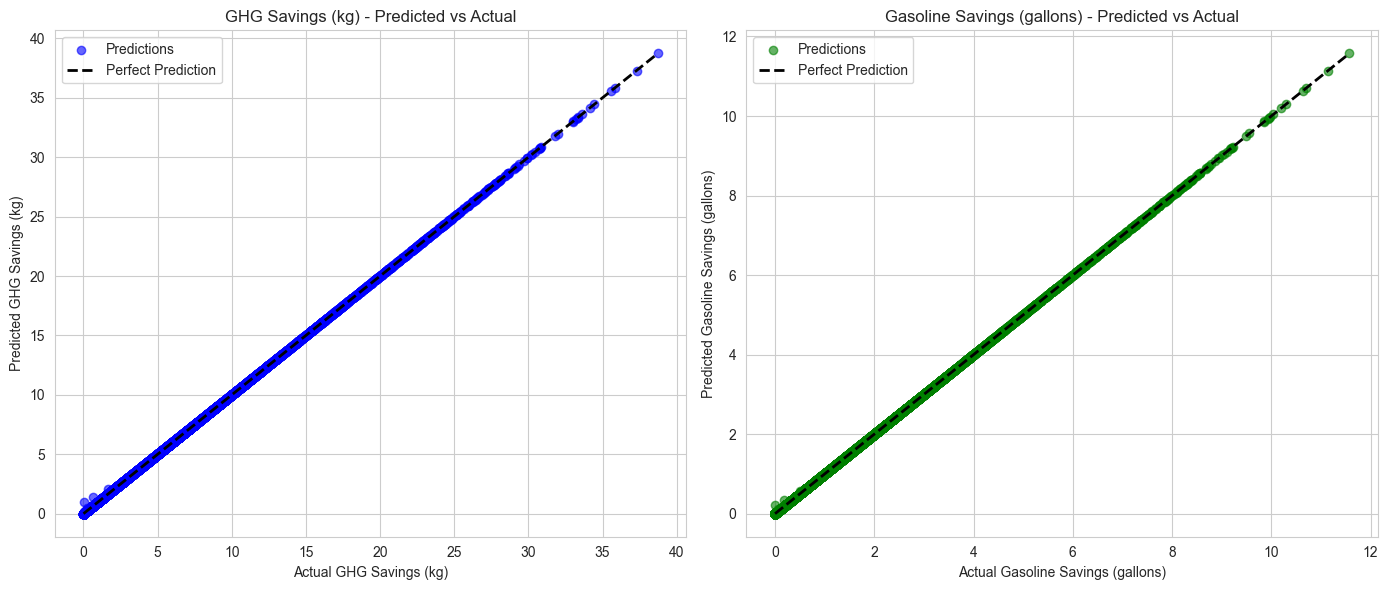

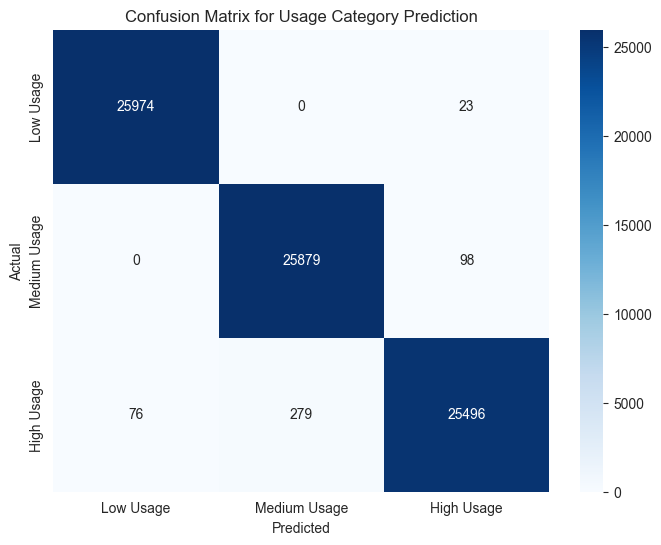

In [155]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report

# Preprocessing for MLP (same as before)
modelNumber_label_encoder = LabelEncoder()
workingEvData["Model Number"] = modelNumber_label_encoder.fit_transform(workingEvData["Model Number"])
stationLabelEncoder = LabelEncoder()
workingEvData['Station Name'] = stationLabelEncoder.fit_transform(workingEvData['Station Name'])
addressLabelEncoder = LabelEncoder()
workingEvData['Address 1'] = addressLabelEncoder.fit_transform(workingEvData['Address 1'])

# --- MLP for Regression (Predicting GHG Savings (kg) and Gasoline Savings (gallons)) ---
X_Data = workingEvData[["Charging Time (Minutes)", "Energy (kWh)", "Year", "Model Number"]]
Y_Data = workingEvData[["GHG Savings (kg)", "Gasoline Savings (gallons)"]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

# Scale features (standardize numerical features)
columns_to_scale = ["Charging Time (Minutes)", "Energy (kWh)", "Year"]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Create MLP model for regression (2 outputs for GHG Savings and Gasoline Savings)
model_reg = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
    Dense(50, activation='relu'),  # Second hidden layer
    Dense(2, activation='linear')  # Output layer for 2 targets (no activation for regression)
])

# Compile the model
model_reg.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression

# Train the model and print epochs
history = model_reg.fit(X_train_scaled, y_train, 
                       epochs=10,  # 100 epochs as in your example
                       batch_size=32,  # Default batch size, adjust as needed
                       validation_split=0.2,  # 20% of training data for validation
                       verbose=1)  # Verbose=1 shows the progress bar

# Make predictions
predictions = model_reg.predict(X_test_scaled)

# Evaluate the model
print("\nMLP Regressor Results for Savings:")
print("MSE: ", mean_squared_error(y_test, predictions))
print("R2 value: ", r2_score(y_test, predictions))

# --- MLP for Classification (Predicting Usage_Category – Low, Medium, High Usage) ---
# Create usage categories based on Energy (kWh)
energy_quantiles = np.percentile(workingEvData["Energy (kWh)"], [25, 50, 75])
workingEvData["Usage_Category"] = pd.qcut(workingEvData["Energy (kWh)"], q=3, labels=["Low Usage", "Medium Usage", "High Usage"])

# Encode the categorical target for modeling
usage_encoder = LabelEncoder()
workingEvData["Usage_Category_Encoded"] = usage_encoder.fit_transform(workingEvData["Usage_Category"])

# Features and target for classification
X_class = workingEvData[["Charging Time (Minutes)", "Energy (kWh)", "Year", "Model Number", "Station Name", "Address 1"]]
y_class = workingEvData["Usage_Category_Encoded"]

# Encode categorical features
for column in ["Station Name", "Address 1", "Model Number"]:
    X_class[column] = LabelEncoder().fit_transform(X_class[column])

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.30, random_state=101)

# Scale features (standardize numerical features)
columns_to_scale = ["Charging Time (Minutes)", "Energy (kWh)", "Year"]
scaler = StandardScaler()
X_train_scaled = X_train_class.copy()
X_test_scaled = X_test_class.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_class[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test_class[columns_to_scale])

# Convert target to categorical for classification (one-hot encoding)
y_train_class_cat = to_categorical(y_train_class, num_classes=3)  # 3 classes: Low, Medium, High
y_test_class_cat = to_categorical(y_test_class, num_classes=3)

# Create MLP model for classification (3 outputs for 3 classes)
model_class = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
    Dense(50, activation='relu'),  # Second hidden layer
    Dense(3, activation='softmax')  # Output layer for 3 classes (softmax for probabilities)
])

# Compile the model
model_class.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical cross-entropy for classification

# Train the model and print epochs
history = model_class.fit(X_train_scaled, y_train_class_cat, 
                         epochs=10,  # 100 epochs as in your example
                         batch_size=32,  # Default batch size, adjust as needed
                         validation_split=0.2,  # 20% of training data for validation
                         verbose=1)  # Verbose=1 shows the progress bar

# Make predictions
predictions_class = model_class.predict(X_test_scaled)
y_pred_class = np.argmax(predictions_class, axis=1)  # Convert probabilities to class labels

# Evaluate the model
print("\nMLP Classifier Results for Usage Patterns:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class, target_names=["Low Usage", "Medium Usage", "High Usage"]))

# --- Regression Plots --- 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for GHG Savings (kg)
axes[0].scatter(y_test["GHG Savings (kg)"], predictions[:, 0], alpha=0.6, color='blue', label='Predictions')
axes[0].plot([y_test["GHG Savings (kg)"].min(), y_test["GHG Savings (kg)"].max()],
             [y_test["GHG Savings (kg)"].min(), y_test["GHG Savings (kg)"].max()],
             'k--', lw=2, label="Perfect Prediction")
axes[0].set_xlabel("Actual GHG Savings (kg)")
axes[0].set_ylabel("Predicted GHG Savings (kg)")
axes[0].set_title("GHG Savings (kg) - Predicted vs Actual")
axes[0].legend()
axes[0].grid(True)

# Plot for Gasoline Savings (gallons)
axes[1].scatter(y_test["Gasoline Savings (gallons)"], predictions[:, 1], alpha=0.6, color='green', label='Predictions')
axes[1].plot([y_test["Gasoline Savings (gallons)"].min(), y_test["Gasoline Savings (gallons)"].max()],
             [y_test["Gasoline Savings (gallons)"].min(), y_test["Gasoline Savings (gallons)"].max()],
             'k--', lw=2, label="Perfect Prediction")
axes[1].set_xlabel("Actual Gasoline Savings (gallons)")
axes[1].set_ylabel("Predicted Gasoline Savings (gallons)")
axes[1].set_title("Gasoline Savings (gallons) - Predicted vs Actual")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Usage", "Medium Usage", "High Usage"], yticklabels=["Low Usage", "Medium Usage", "High Usage"])
plt.title("Confusion Matrix for Usage Category Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
